In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cols = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
        'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
        'Total Length of Bwd Packets',
        'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean''Fwd Packet Length Std',
        'Bwd Packet Length Max',
        'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
        'Flow IAT Mean',
        'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
        'Fwd IAT Min',
        'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
        'Fwd URG Flags',
        'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
        'Min Packet Length', 'Max Packet Length',
        'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
        'RST Flag Count',
        'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
        'Average Packet Size',
        'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
        'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
        'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
        'Subflow Bwd Packets',
        'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
        'min_seg_size_forward',
        'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
        'SimillarHTTP',
        'Inbound', 'Label']

dataset = pd.read_csv('F:\\Outtawa\\AI CS\\interim (1)\\training.csv', names=cols, skiprows=1)
# print(dataset)
dataset_val = pd.read_csv('F:\\Outtawa\\AI CS\\interim (1)\\validation.csv', names=cols, skiprows=1)

C:\Users\Lobna Lolo\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

dataset.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'],
             axis=1, inplace=True)
dataset_val.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'],
                 axis=1, inplace=True)

dataset.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count',
              'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
              'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1, inplace=True)
dataset_val.drop(
    ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count',
     'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
     'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

dataset['Label'] = dataset['Label'].replace({'DrDoS_DNS': 1})
dataset['Label'] = dataset['Label'].replace({'BENIGN': 0})
dataset_val['Label'] = dataset_val['Label'].replace({'DrDoS_DNS': 1})
dataset_val['Label'] = dataset_val['Label'].replace({'BENIGN': 0})

lbl_encoder = LabelEncoder()
dataset['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
dataset_val['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
dataset['SimillarHTTP'] = lbl_encoder.fit_transform(dataset['SimillarHTTP'])
dataset_val['SimillarHTTP'] = lbl_encoder.transform(dataset_val['SimillarHTTP'])

# corr_df = pd.DataFrame()
# corr_df['Label'] = dataset['Label']
# corr_df['Flow Bytes/s'] = dataset['Flow Bytes/s']
#
# plt.figure(figsize=(2,2))
# sns.heatmap(corr_df.corr(), annot = True, cmap = 'coolwarm')
# plt.show()

#####################################################################################

In [4]:
dataset.drop(['Flow Bytes/s'], axis=1, inplace=True)
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)

xtrain, ytrain = dataset.iloc[:, :-1], dataset['Label']
dataset_val.drop(['Flow Bytes/s'], axis=1, inplace=True)
x_val, y_val = dataset_val.iloc[:, :-1], dataset_val['Label']

                     Specs          Score
64                 Inbound  947922.861601
42           Down/Up Ratio  507334.021161
9    Bwd Packet Length Min  429472.963171
40          URG Flag Count  414809.342235
10  Bwd Packet Length Mean  161917.559051
45    Avg Bwd Segment Size  161917.559051
27           Fwd PSH Flags  132843.971792
38          RST Flag Count  132843.971792
8    Bwd Packet Length Max  117997.847312
35       Packet Length Std  112582.425824


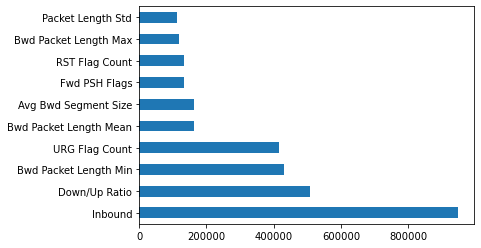

In [12]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(xtrain, ytrain)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(xtrain.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))
featureScores = pd.Series(fit.scores_, index=xtrain.columns)

featureScores.nlargest(10).plot(kind='barh')
plt.show()

[3.47430404e-03 6.85621447e-03 1.91987463e-03 6.83969229e-03
 1.05823578e-02 3.22485530e-02 1.48993772e-02 2.71228751e-03
 1.71206935e-02 4.28580022e-02 2.34136318e-02 2.54297595e-03
 1.15803826e-02 4.98451338e-03 5.43559730e-03 4.67988822e-03
 1.58673634e-03 9.59656511e-03 2.77067591e-03 5.49678267e-03
 4.65747741e-03 1.05366149e-03 3.00627497e-03 2.56100960e-03
 4.68037865e-03 6.10394511e-03 3.63864058e-03 2.35569258e-02
 1.36400286e-02 7.85014632e-03 1.14416450e-02 9.54161562e-03
 2.15924875e-02 9.53632905e-03 9.71132069e-03 7.15870324e-03
 1.78848847e-03 2.58146917e-03 1.55861635e-02 1.25548300e-02
 1.13384168e-01 3.26304978e-02 6.74166482e-02 1.27847885e-02
 1.37021268e-02 2.16232941e-02 1.44547564e-02 2.69710120e-03
 1.96941633e-03 6.96067218e-03 1.84625867e-02 2.16771179e-02
 1.42330837e-02 4.19134015e-03 5.10683807e-02 1.09433472e-03
 1.26914840e-04 6.27684730e-04 1.10077399e-03 5.05492706e-03
 2.62059638e-04 3.79891312e-03 4.64584897e-03 1.43388899e-03
 2.00758028e-01]


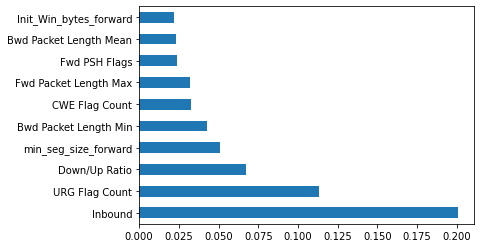

In [13]:
model = ExtraTreesClassifier()
model.fit(xtrain, ytrain)
print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()